In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from scipy.signal import get_window
import time

#dBu = 20log10(V/0.775V)
#The FFT assumes that the signal is periodic and continuous within the window. 
#If the signal is not perfectly periodic, it can cause spectral leakage, which results in an offset or differences in the frequency spectrum.
def rfft_plot(y, f_s, freqs):
    window = get_window("hanning", len(y))
    y_windowed = y * window
    N = len(y)
    print(f"N = {N}")

    Y = fft.rfft(y_windowed)
    Y_normalized = np.abs(Y) / N
    Y_dBu = 20*(np.log10(np.abs(Y_normalized * 0.001))/ 0.775)
    
    plt.figure(figsize=(5, 4))
    plt.plot(freqs, Y_dBu, label = 'DFT')
    plt.title('Frequency spectrum')
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Frequency Domain Magnitude [dBu]')
    plt.grid(True)
    plt.semilogx()
    plt.legend(fontsize = 20)

    plt.savefig("070824_15.46/dft.png", format = "png", bbox_inches="tight")
    plt.savefig("070824_15.46/dft.pdf", format = "pdf", bbox_inches="tight")

    plt.show()
    
    return Y

In [19]:
day = "07082024"
hour = "15.46"

In [20]:
df = pd.read_csv(f"../Waveforms/{day}/{day}_{hour}/{day}_{hour}_wf.csv/{day}_{hour}_wf_01.csv")
data = df.to_numpy()
print(data[:1])
data = data[1:]
print(data)


[['(us)' '(mV)']]
[['0.00000000' '-7.08661400']
 ['0.00080000' '-6.69291300']
 ['0.00160000' '-6.29921200']
 ...
 ['50.00080067' '-6.69291300']
 ['50.00160067' '-6.69291300']
 ['50.00240067' '-6.69291300']]


In [21]:
data_float = data.astype(float)
times = data_float[1:, 0]
print(f"Times: {times}")

amplitudes = data_float[1:, 1]
print(f"Amplitudes: {amplitudes}")

Times: [8.00000000e-04 1.60000000e-03 2.40000000e-03 ... 5.00008007e+01
 5.00016007e+01 5.00024007e+01]
Amplitudes: [-6.692913 -6.299212 -6.299212 ... -6.692913 -6.692913 -6.692913]


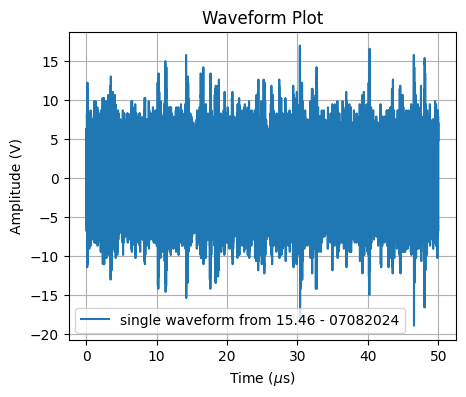

In [29]:
plt.figure(figsize=(5, 4))
plt.plot(times, amplitudes, label=f'single waveform from {hour} - {day}')
plt.title('Waveform Plot')
plt.xlabel(r'Time ($\mu$s)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)

plt.savefig("070824_15.46/wf.png", format = "png", bbox_inches="tight")
plt.savefig("070824_15.46/wf.pdf", format = "pdf", bbox_inches="tight")

plt.show()

f_ s = 1249.9999832508042
N = 62503


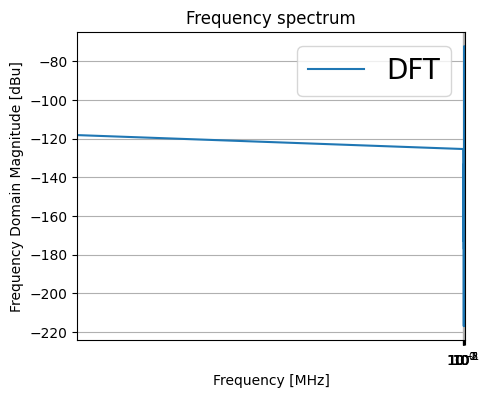

Execution time: 2.002544641494751 seconds


In [33]:
span = times[len(times)-1] 
f_s = len(times) / span
print(f"f_ s = {f_s}")
freqs = fft.rfftfreq(len(amplitudes), 1/f_s)#window lenght, sample spacing
#plot the fft and see how much time it takes
start_time = time.time()

A = rfft_plot(amplitudes, f_s, freqs)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")

# Comaprison with GUI spectrum



In [24]:
df = pd.read_csv(f'../Waveforms/{day}/{day}_{hour}/{day}_{hour}_fft.csv/{day}_{hour}_fft_01.csv')
spe = df.to_numpy()
print(spe[:1])
spe = spe[1:]
print(spe)

[['(MHz)' '(dBu)']]
[['0.00000000' '-77.08023000']
 ['0.03814697' '-84.25154000']
 ['0.07629395' '-97.46619000']
 ...
 ['349.96032715' '-111.15530000']
 ['349.99847412' '-107.28110000']
 ['350.03662109' '-109.20630000']]


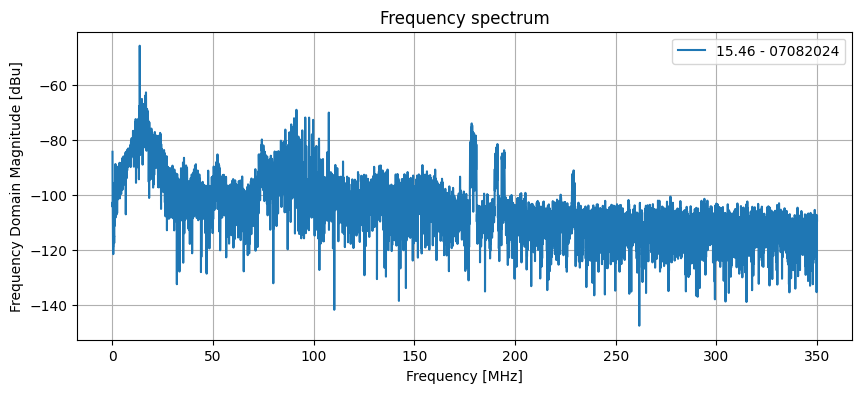

In [25]:
spe_float = spe.astype(float)
frequences = spe_float[1:, 0]

magnitudes = spe_float[1:, 1]

plt.figure(figsize=(10, 4))
plt.plot(frequences, magnitudes, label=f'{hour} - {day}')
plt.title('Frequency spectrum')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Frequency Domain Magnitude [dBu]')
plt.legend()
plt.grid(True)
plt.show()